In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784',version=1)

d=mnist.data
l=mnist.target

df=pd.DataFrame(d)
df['label']=1
print(df.head(4))

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  label  
0         0         0         0      1  
1         0         0         0      1  
2         0         0         0      1  
3         0         0         0      1  

[4 rows x 78

In [3]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(df)
print(standardized_data.shape)

(70000, 785)


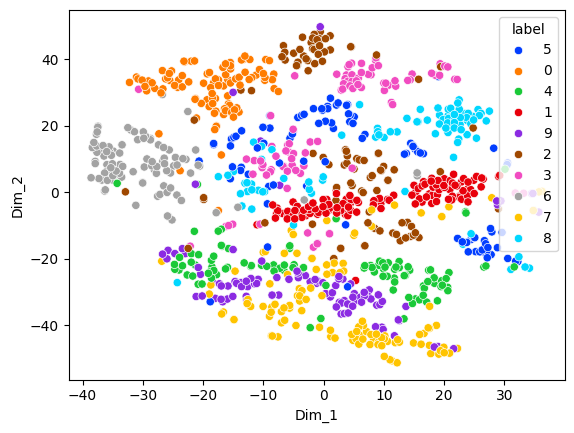

In [4]:
data_1000 = standardized_data[0:1000, :]
labels_1000 = l[0:1000]

model = TSNE(n_components = 2, random_state = 0)

tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()